<a href="https://colab.research.google.com/github/maxim371/DS-Unit-2-Applied-Modeling/blob/master/Maxwell_Kwarteng_DS_Sprint_Challenge_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_

# Applied Modeling Sprint Challenge: Predict Chicago food inspections 🍔

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to install packages in Colab:

In [1]:
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pandas-profiling==2.*
    !pip install pdpbox
    !pip install shap

     |████████████████████████████████| 102kB 4.6MB/s 
     |████████████████████████████████| 112kB 4.9MB/s 
     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 614kB 40.7MB/s 
     |████████████████████████████████| 235kB 50.6MB/s 
     |████████████████████████████████| 307kB 50.8MB/s 
     |████████████████████████████████| 215kB 58.7MB/s 
     |████████████████████████████████| 51kB 22.8MB/s 
     |████████████████████████████████| 737kB 32.1MB/s 
     |████████████████████████████████| 51kB 11.5MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=f2156e51ce576b37f97f90da16e484849e3ea6a5a08ae2a3d32f735f717f72cc
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=1d9f737e4edac7f30fc84a3565245ec0b5ea9bcd4ea334228d7f9a3f54967078
  Stored 

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._

### Part 2: Modeling

**Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.

Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._


### Part 3: Visualization

Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:

- Permutation Importances
- Partial Dependence Plot, 1 feature isolation
- Partial Dependence Plot, 2 features interaction
- Shapley Values

_To earn a score of 3 for this part, make all four of these visualization types._

## Part 1: Preprocessing

> You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding.

In [0]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [0]:
numeric = train.select_dtypes(include= "number").columns
categorical = train.select_dtypes(exclude = "number").columns

In [0]:
c_steps = [('c_imputer', SimpleImputer(strategy="most_frequent"))]
c_pipeline = Pipeline(c_steps)

n_steps = [('n_imputer', SimpleImputer())]
n_pipeline = Pipeline(n_steps)

In [0]:
train[numeric] = n_pipeline.fit_transform(train[numeric])
train[categorical] = c_pipeline.fit_transform(train[categorical])

In [0]:
def simple_preprocess(train, switch):
  
  if switch == 0:
    n_steps = [('n_imputer', SimpleImputer())]
    n_pipeline = Pipeline(n_steps)
    train = n_pipeline.fit(df.values)
  
  elif switch == 1:
    c_steps = [('c_imputer', SimpleImputer(strategy="most_frequent")),
            ('onehot', OneHotEncoder())]
    c_pipeline = Pipeline(c_steps)
    categorical_data = c_pipeline.fit_transform(train.values).toarray()
    train = pd.DataFrame(columns= c_pipeline['onehot'].get_feature_names(), data=categorical_data)
  
  elif switch == 2:
    numeric = train.select_dtypes(include= "number")
    categorical = train.select_dtypes(exclude = "number")
    c_steps = [('c_imputer', SimpleImputer(strategy="most_frequent")),
            ('onehot', OneHotEncoder())]
    c_pipeline = Pipeline(c_steps)
    n_steps = [('n_imputer', SimpleImputer())]
    n_pipeline = Pipeline(n_steps)
    numeric_data = n_pipeline.fit_transform(numeric)
    categorical_data = c_pipeline.fit_transform(categorical).toarray()
    numeric = pd.DataFrame(columns= numeric.columns, data=numeric_data)
    categorical = pd.DataFrame(columns= c_pipeline['onehot'].get_feature_names(), data=categorical_data)
    train = pd.concat([numeric, categorical], axis = 1)
  
  else:
    print("Invalid Switch")
  
  return train

In [19]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270.0,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1.0
1,555268.0,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0.0
2,1751394.0,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0.0
3,1763905.0,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0.0
4,453326.0,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.879568,-87.676663,"{'longitude': '-87.91442843927047', 'latitude'...",0.0


## Part 2: Modeling

> **Fit a model** with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation or do a three-way split (train/validate/test) and **estimate your ROC AUC** validation score.
>
> Use your model to **predict probabilities** for the test set. **Get an ROC AUC test score >= 0.60.**

In [0]:
target = 'Fail'
X = train.drop(columns=target)
y = train[target]

In [27]:
# Do train/validate/test 3-way split
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=9000, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=9000, 
    stratify=y_trainval, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (33916, 16)
y_train shape (33916,)
X_val shape (9000, 16)
y_val shape (9000,)
X_test shape (9000, 16)
y_test shape (9000,)


In [28]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

eval_set = [(X_train_processed, y_train), 
            (X_val_processed, y_val)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.677382	validation_1-auc:0.64273
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.694862	validation_1-auc:0.640423
[2]	validation_0-auc:0.69306	validation_1-auc:0.643405
[3]	validation_0-auc:0.704624	validation_1-auc:0.644306
[4]	validation_0-auc:0.706296	validation_1-auc:0.644178
[5]	validation_0-auc:0.703436	validation_1-auc:0.643899
[6]	validation_0-auc:0.702074	validation_1-auc:0.63257
[7]	validation_0-auc:0.700248	validation_1-auc:0.63257
[8]	validation_0-auc:0.700145	validation_1-auc:0.63257
[9]	validation_0-auc:0.700151	validation_1-auc:0.632547
[10]	validation_0-auc:0.706694	validation_1-auc:0.632543
[11]	validation_0-auc:0.706432	validation_1-auc:0.632534
[12]	validation_0-auc:0.705896	validation_1-auc:0.63255
[13]	validation_0-auc:0.707677	validation_1-auc:0.631628
Stopping. Best iteration:
[3]	validation_0-auc:0.704624	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))

Test ROC AUC: 0.6368566964950122


In [30]:
model.predict_proba(X_test_processed)

array([[0.6200814 , 0.37991858],
       [0.660426  , 0.33957395],
       [0.5591854 , 0.44081458],
       ...,
       [0.5591854 , 0.44081458],
       [0.6684447 , 0.3315553 ],
       [0.61040723, 0.38959274]], dtype=float32)

In [31]:
model.predict_proba(X_test_processed)[:, 0]

array([0.6200814 , 0.660426  , 0.5591854 , ..., 0.5591854 , 0.6684447 ,
       0.61040723], dtype=float32)

In [32]:
model.predict_proba(X_test_processed)[:, 1]

array([0.37991858, 0.33957395, 0.44081458, ..., 0.44081458, 0.3315553 ,
       0.38959274], dtype=float32)

## Part 3: Visualization

> Make visualizations for model interpretation. (You may use any libraries.) Choose two of these types:
>
> - Permutation Importances
> - Partial Dependence Plot, 1 feature isolation
> - Partial Dependence Plot, 2 features interaction
> - Shapley Values

In [34]:
row = X_test.iloc[[290]]
row

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location
27977,659733.0,FLUR LLC,FLUR LLC,2133650.0,Shared Kitchen User (Long Term),Risk 3 (Low),5063 W 29TH ST STE 2,CICERO,IL,60804.0,2011-12-16T00:00:00,License,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.879568,-87.676663,"{'longitude': '-87.91442843927047', 'latitude'..."


In [35]:
import shap

# processor = pipeline[:-1]

explainer = shap.TreeExplainer(model)
row_process = processor.transform(row)
shap_values = explainer.shap_values(row_process)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)


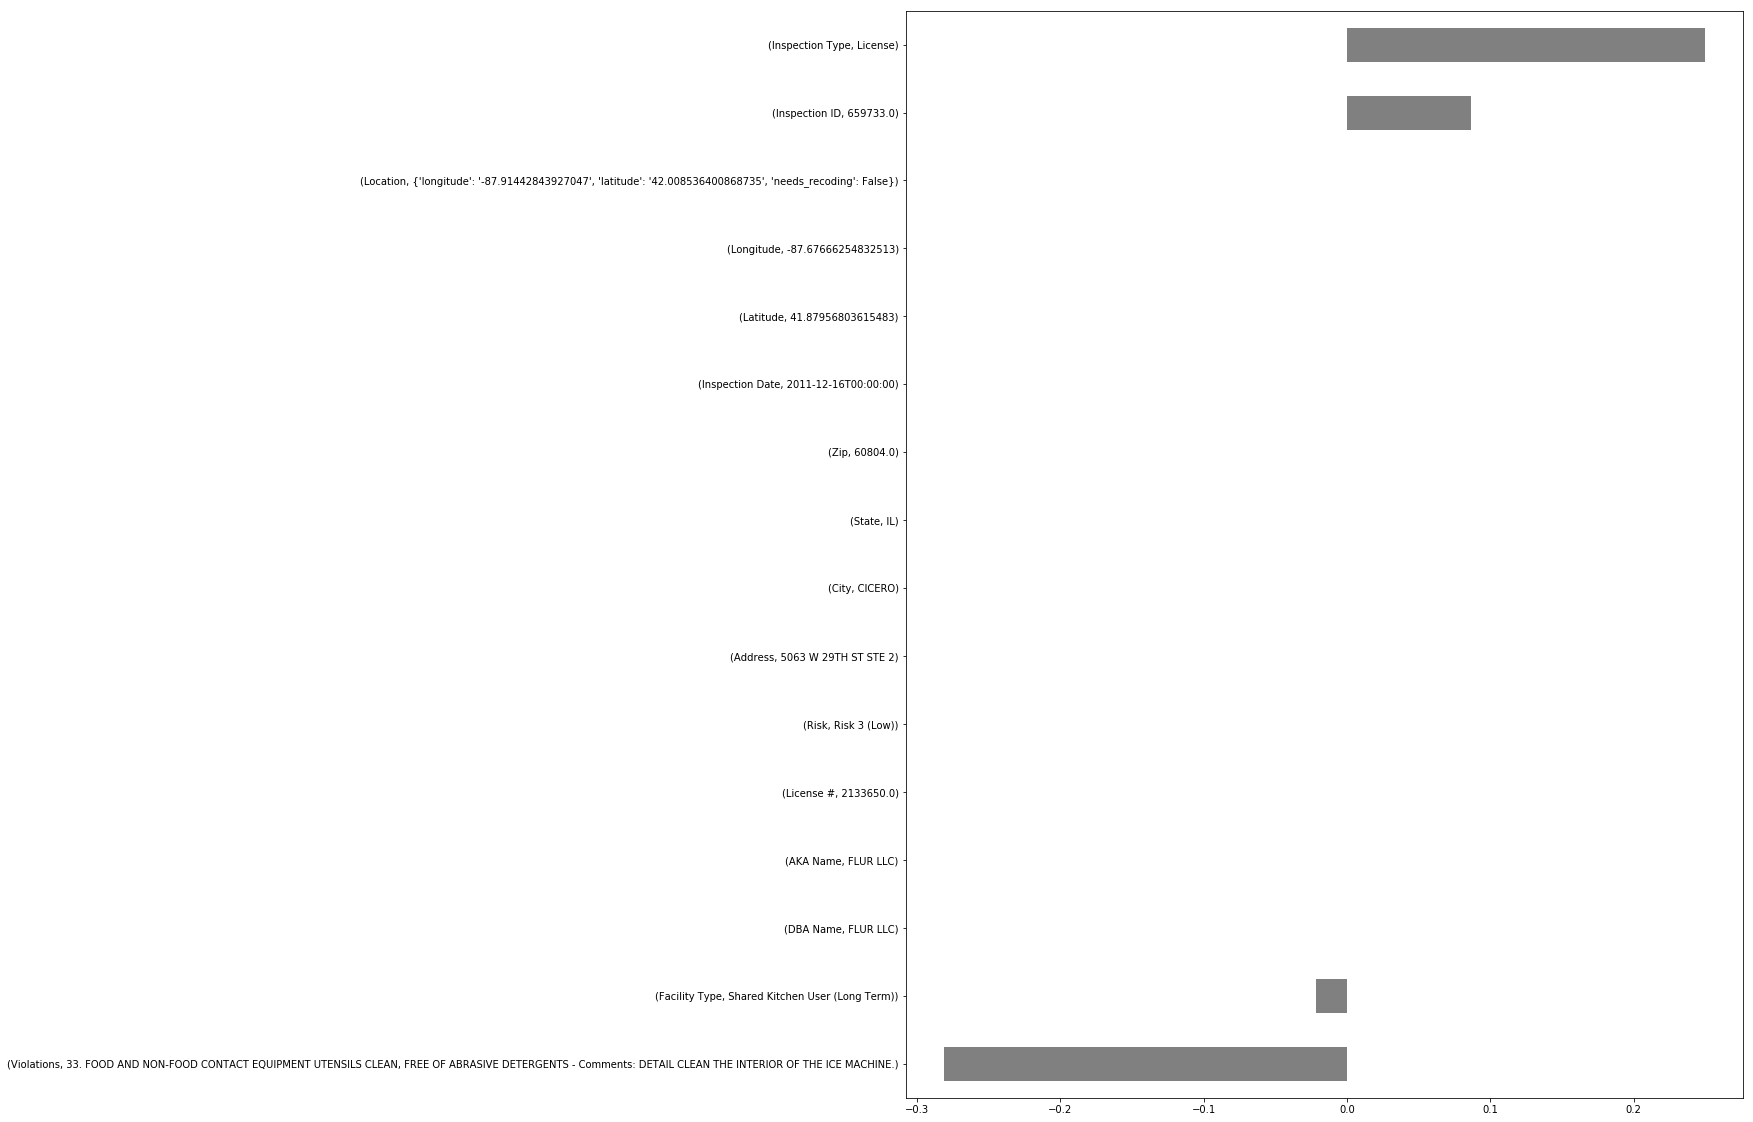

In [36]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names,feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(15,20));

In [40]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 -0.0008323469659556881


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [42]:
gb

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['DBA Name', 'AKA Name', 'Facility Type',
                                      'Risk', 'Address', 'City', 'State',
                                      'Inspection Date', 'Inspection Type',
                                      'Violations', 'Location'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'DBA Name',
                                          'data_type': dtype('O'),
                                          'mapping': MCDONALD'S                                                1
XSPORT FITNESS                                            2
A ONE GY...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,

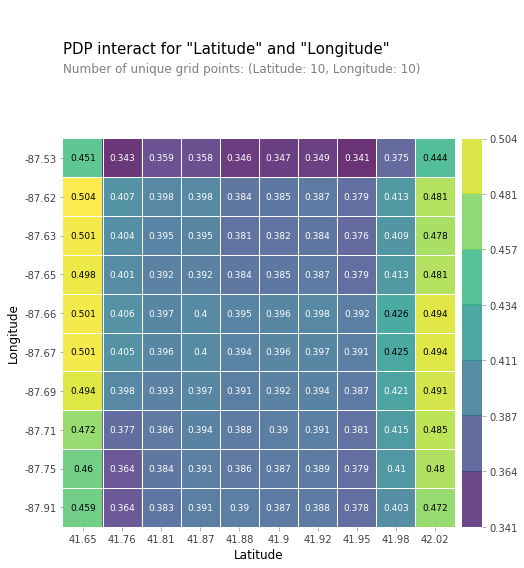

In [48]:
# TODO

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Latitude', 'Longitude']

interaction = pdp_interact(
  model=gb,
  dataset=X_val,
  model_features=X_val.columns,
  features=features 
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);